## Fuente: https://github.com/GoogleTrends/data/tree/master

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words
from collections import Counter
import random



sns.reset_defaults()

datatrooper_palette = [
    "#E6D3AD",
    "#967B4F",
    "#46493D",
    "#839DA5",
    "#9FADAD",
    "#2B4144",
    "#986E37"
]

plt.style.use('fivethirtyeight')
sns.set_palette(datatrooper_palette)
#  #1D1D3D o black
sns.set(rc={'axes.facecolor':'#1D1D3D', 'figure.facecolor':'#1D1D3D'})

sns.set_context("talk")
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [2]:
df = pd.read_csv("../../../data/20180705_Global_Search_Interest_World_Cup_Matches.csv", skiprows=3)
df['Share of search'] = df['Share of search'].str.replace('%', '')

In [3]:
df.head(50)

,Match,Share of search
0,Mexico vs Germany,6.90
1,Argentina vs Nigeria,5.70
2,Croatia vs Argentina,4.90
3,Uruguay vs Egypt,4.30
4,Morocco vs Portugal,4.00
5,Iceland vs Argentina,3.90
6,Costa Rica vs Brazil,3.50
7,Iceland vs Nigeria,3.30
8,Sweden vs Mexico,3.30
9,Croatia vs Iceland,3.10


In [4]:
df_group = df.head(47)
df_group['Share of search'] = df_group['Share of search'].astype(float)
df_group.head()

/home/tomas/Documents/Proyectos/Datatrooper/instatrooper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Match,Share of search
0,Mexico vs Germany,6.9
1,Argentina vs Nigeria,5.7
2,Croatia vs Argentina,4.9
3,Uruguay vs Egypt,4.3
4,Morocco vs Portugal,4.0


In [5]:
df_octa = df.iloc[51:59]
df_octa['Share of search'] = df_octa['Share of search'].astype(float)
df_octa.head(100)

/home/tomas/Documents/Proyectos/Datatrooper/instatrooper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Match,Share of search
51,Portugal vs Uruguay,23.20
52,Mexico vs Brazil,22.68
53,Argentina vs France,17.84
54,England vs Colombia,16.38
55,Denmark vs Croatia,12.02
56,Japan vs Belgium,4.27
57,Russia vs Spain,2.17
58,Switzerland vs Sweden,1.45


In [6]:
df_cuartos = df.iloc[62:66]
df_cuartos['Share of search'] = df_cuartos['Share of search'].astype(float)
df_cuartos.head()

/home/tomas/Documents/Proyectos/Datatrooper/instatrooper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Match,Share of search
62,France vs Uruguay,47.84
63,Brazil vs Belgium,29.87
64,England vs Sweden,19.03
65,Russia vs Croatia,3.26


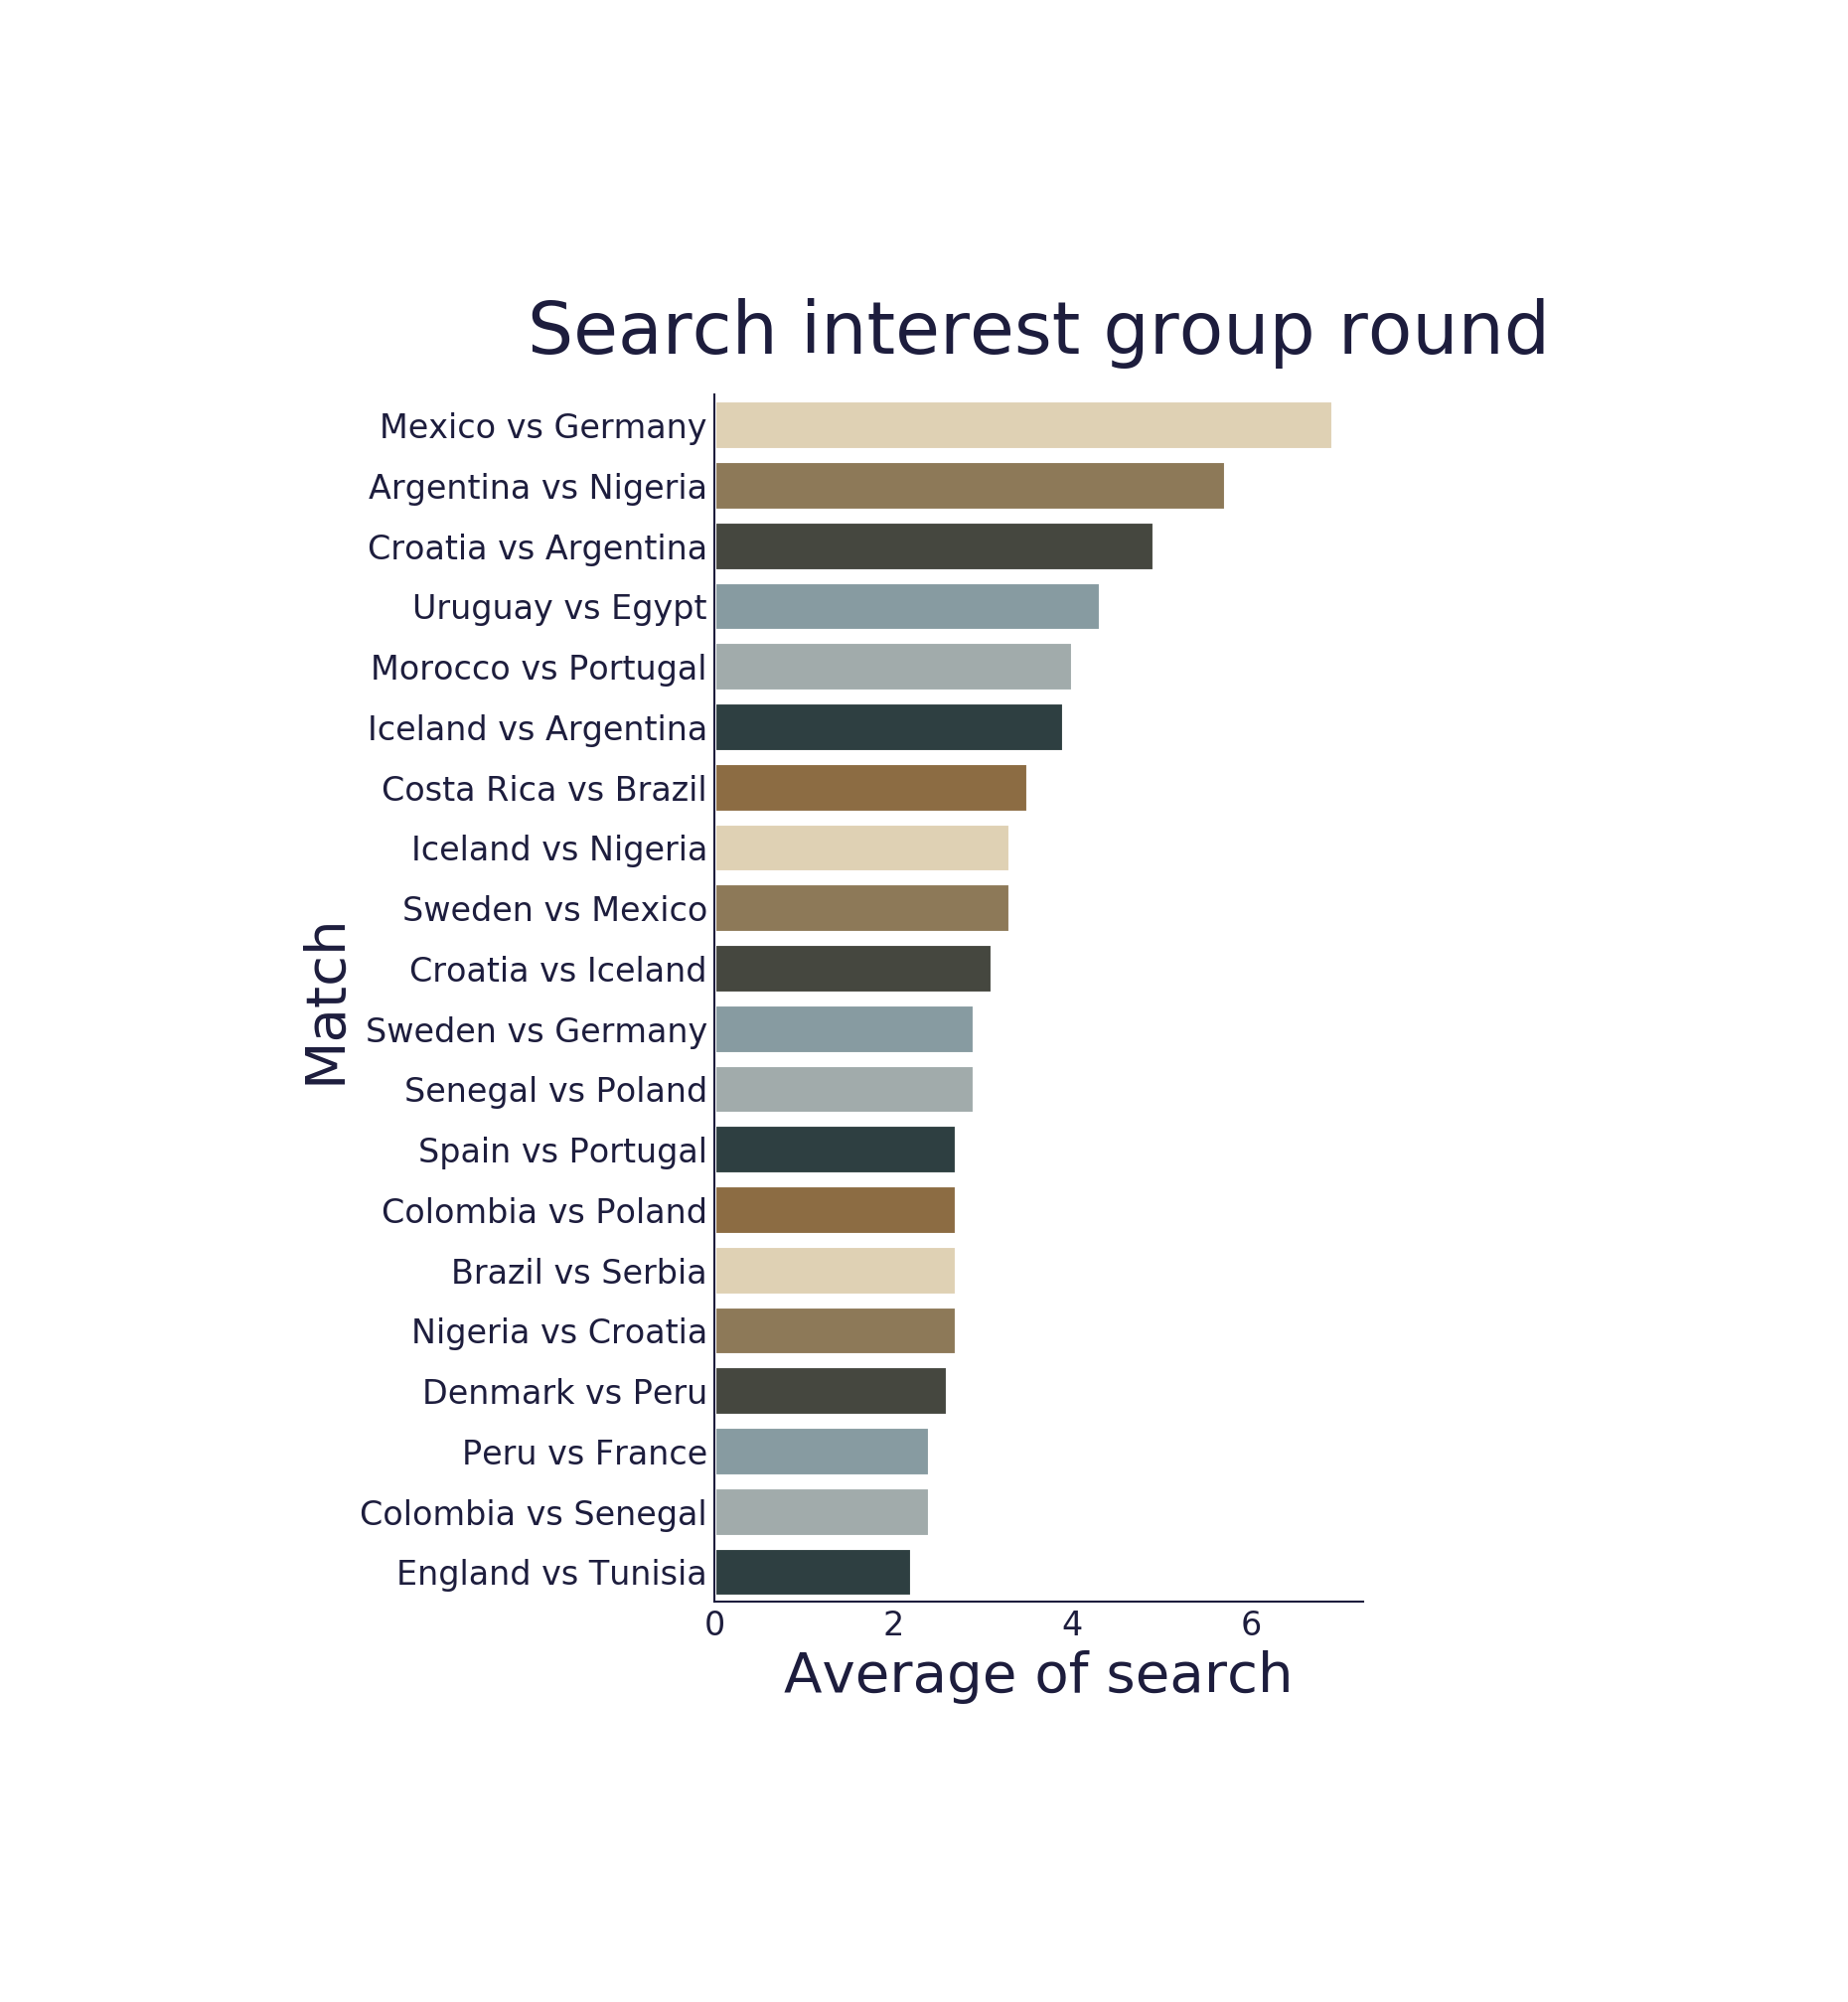

In [8]:
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
fig = plt.figure(figsize=(5,10))


#sns.set(font_scale = 0.8)


ax = sns.barplot(y="Match", x="Share of search",orient="h", data = df_group.head(20),palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("Search interest group round", pad=20, fontsize=35)
ax.set_xlabel("Average of search", fontsize=27)
ax.set_ylabel("Match", fontsize=27)

plt.show()
fig.savefig('grupos.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

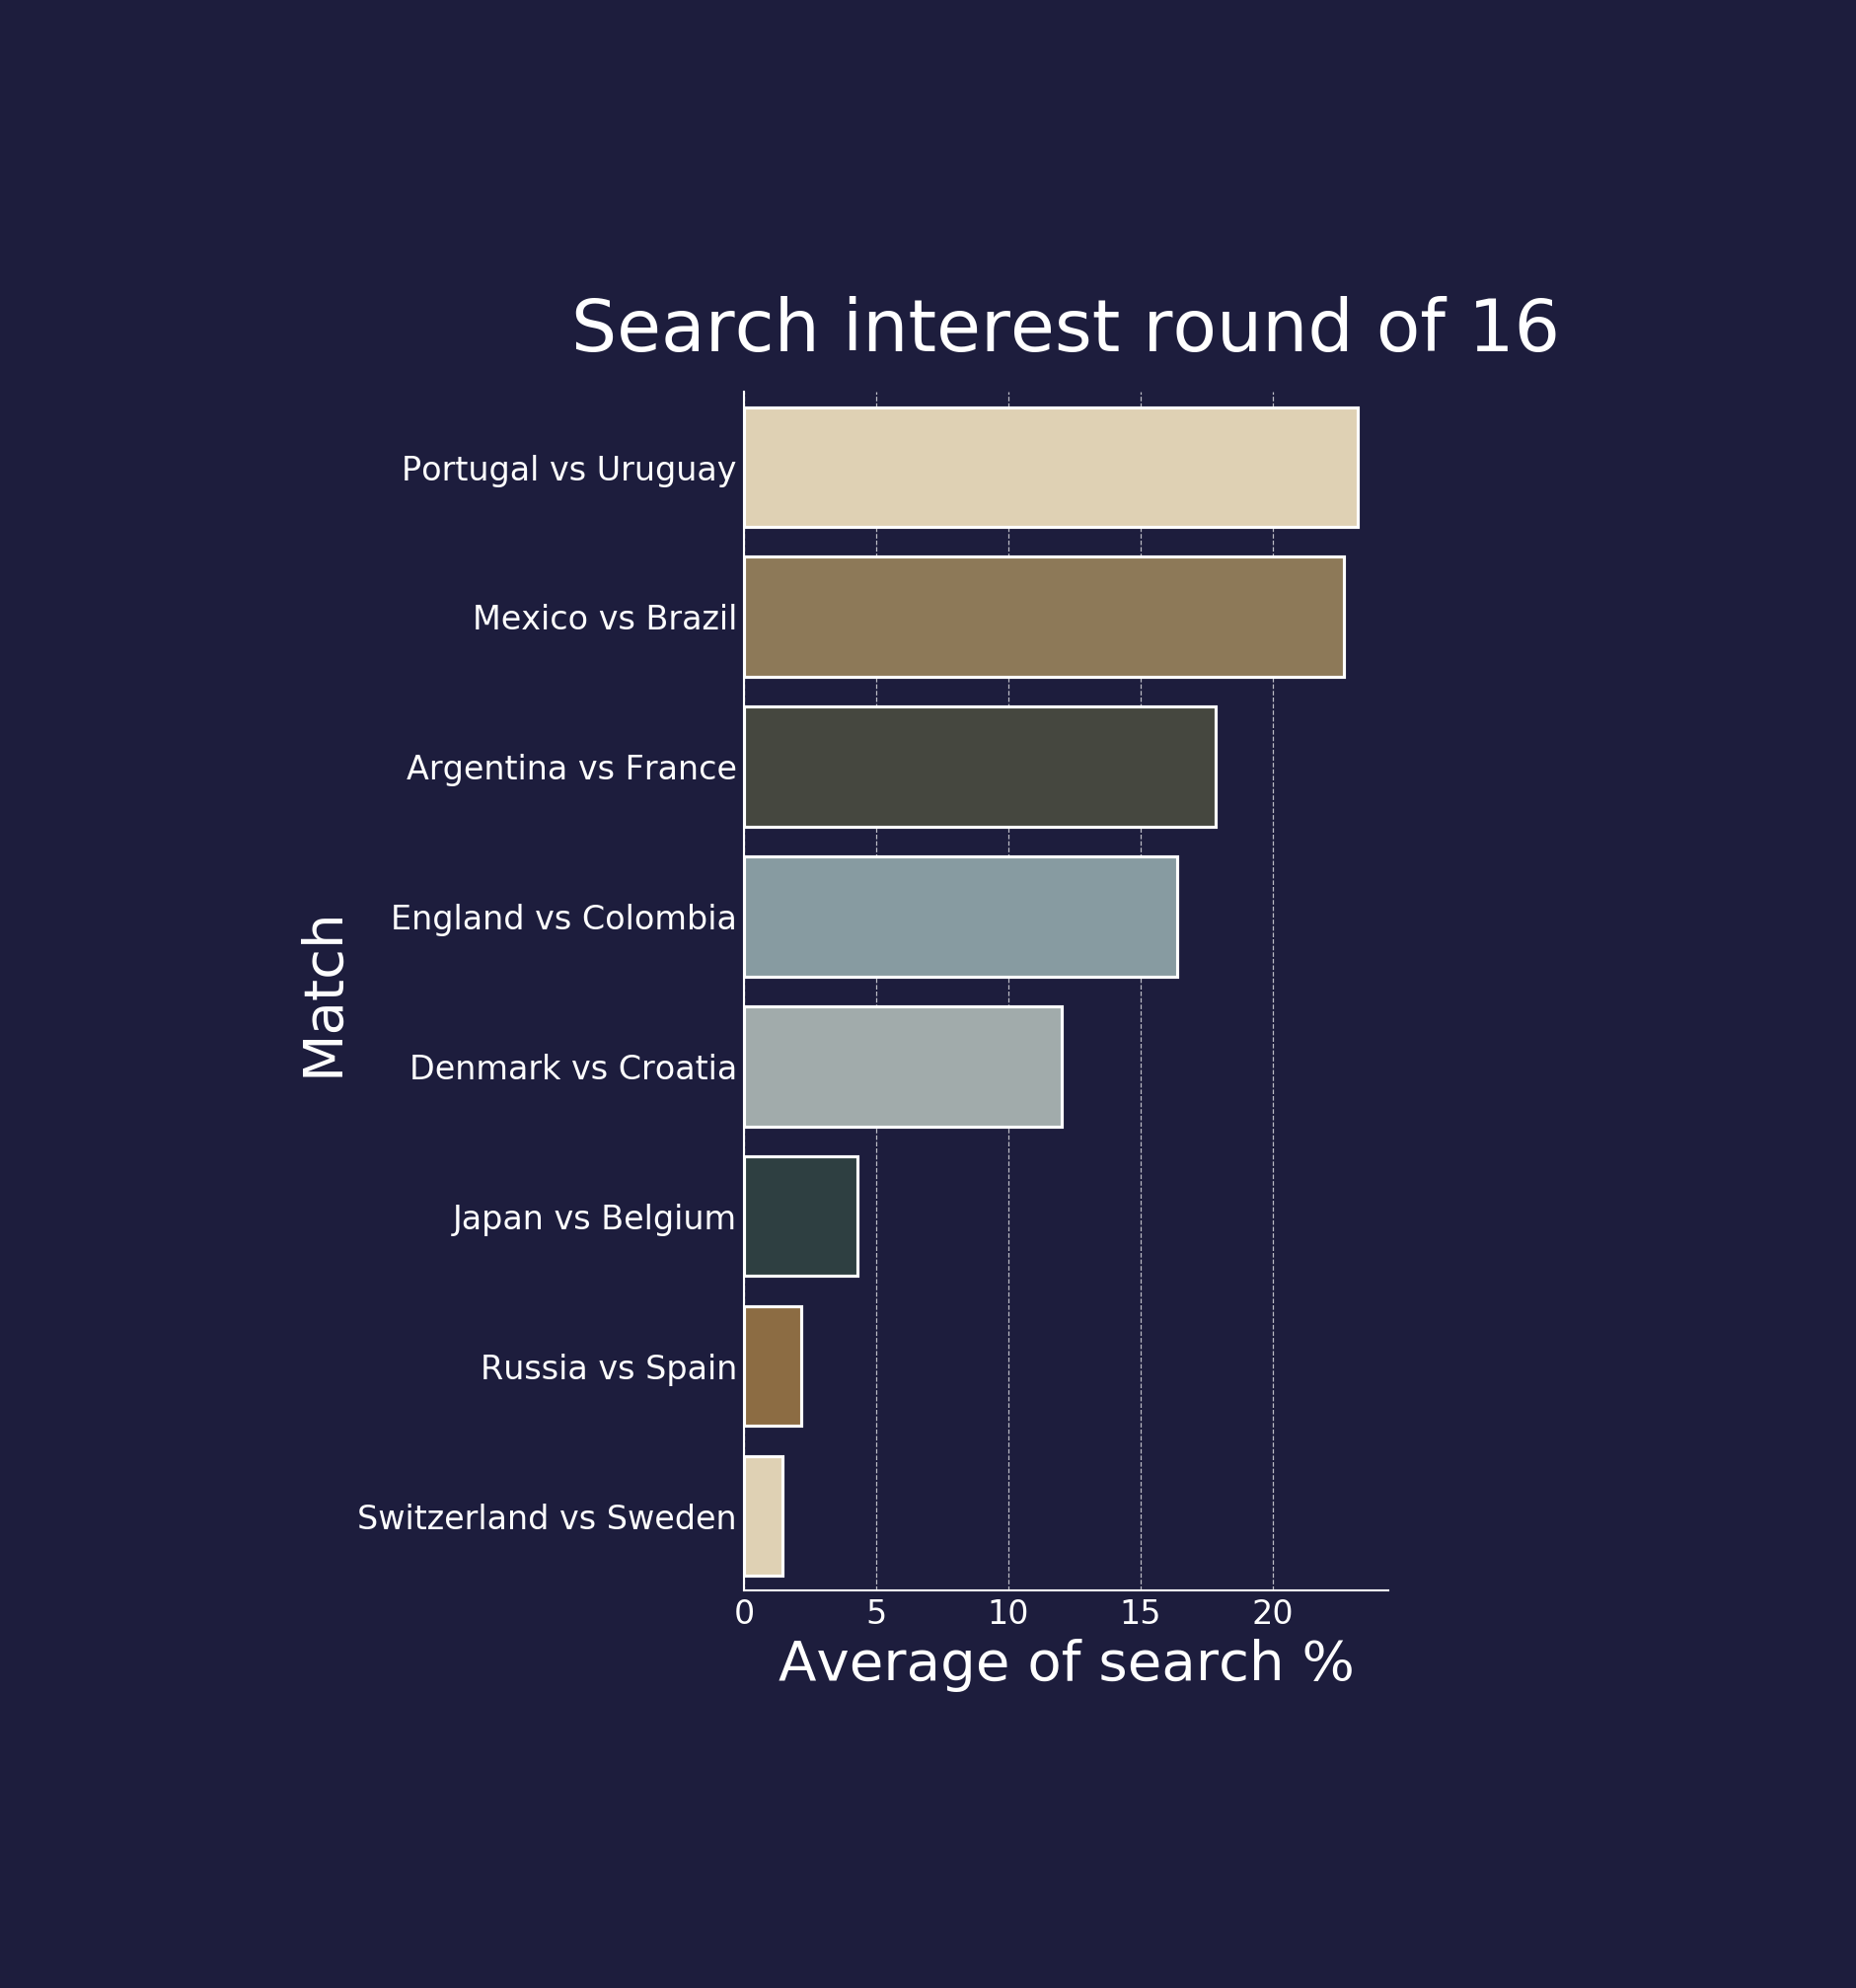

In [9]:
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/bluetrooper.mplstyle')
fig = plt.figure(figsize=(5,10))
ax = sns.barplot(y="Match", x="Share of search",orient="h", data = df_octa,palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("Search interest round of 16", pad=20, fontsize=35)
ax.set_xlabel("Average of search %", fontsize=27)
ax.set_ylabel("Match", fontsize=27)

plt.show()
fig.savefig('octavos.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

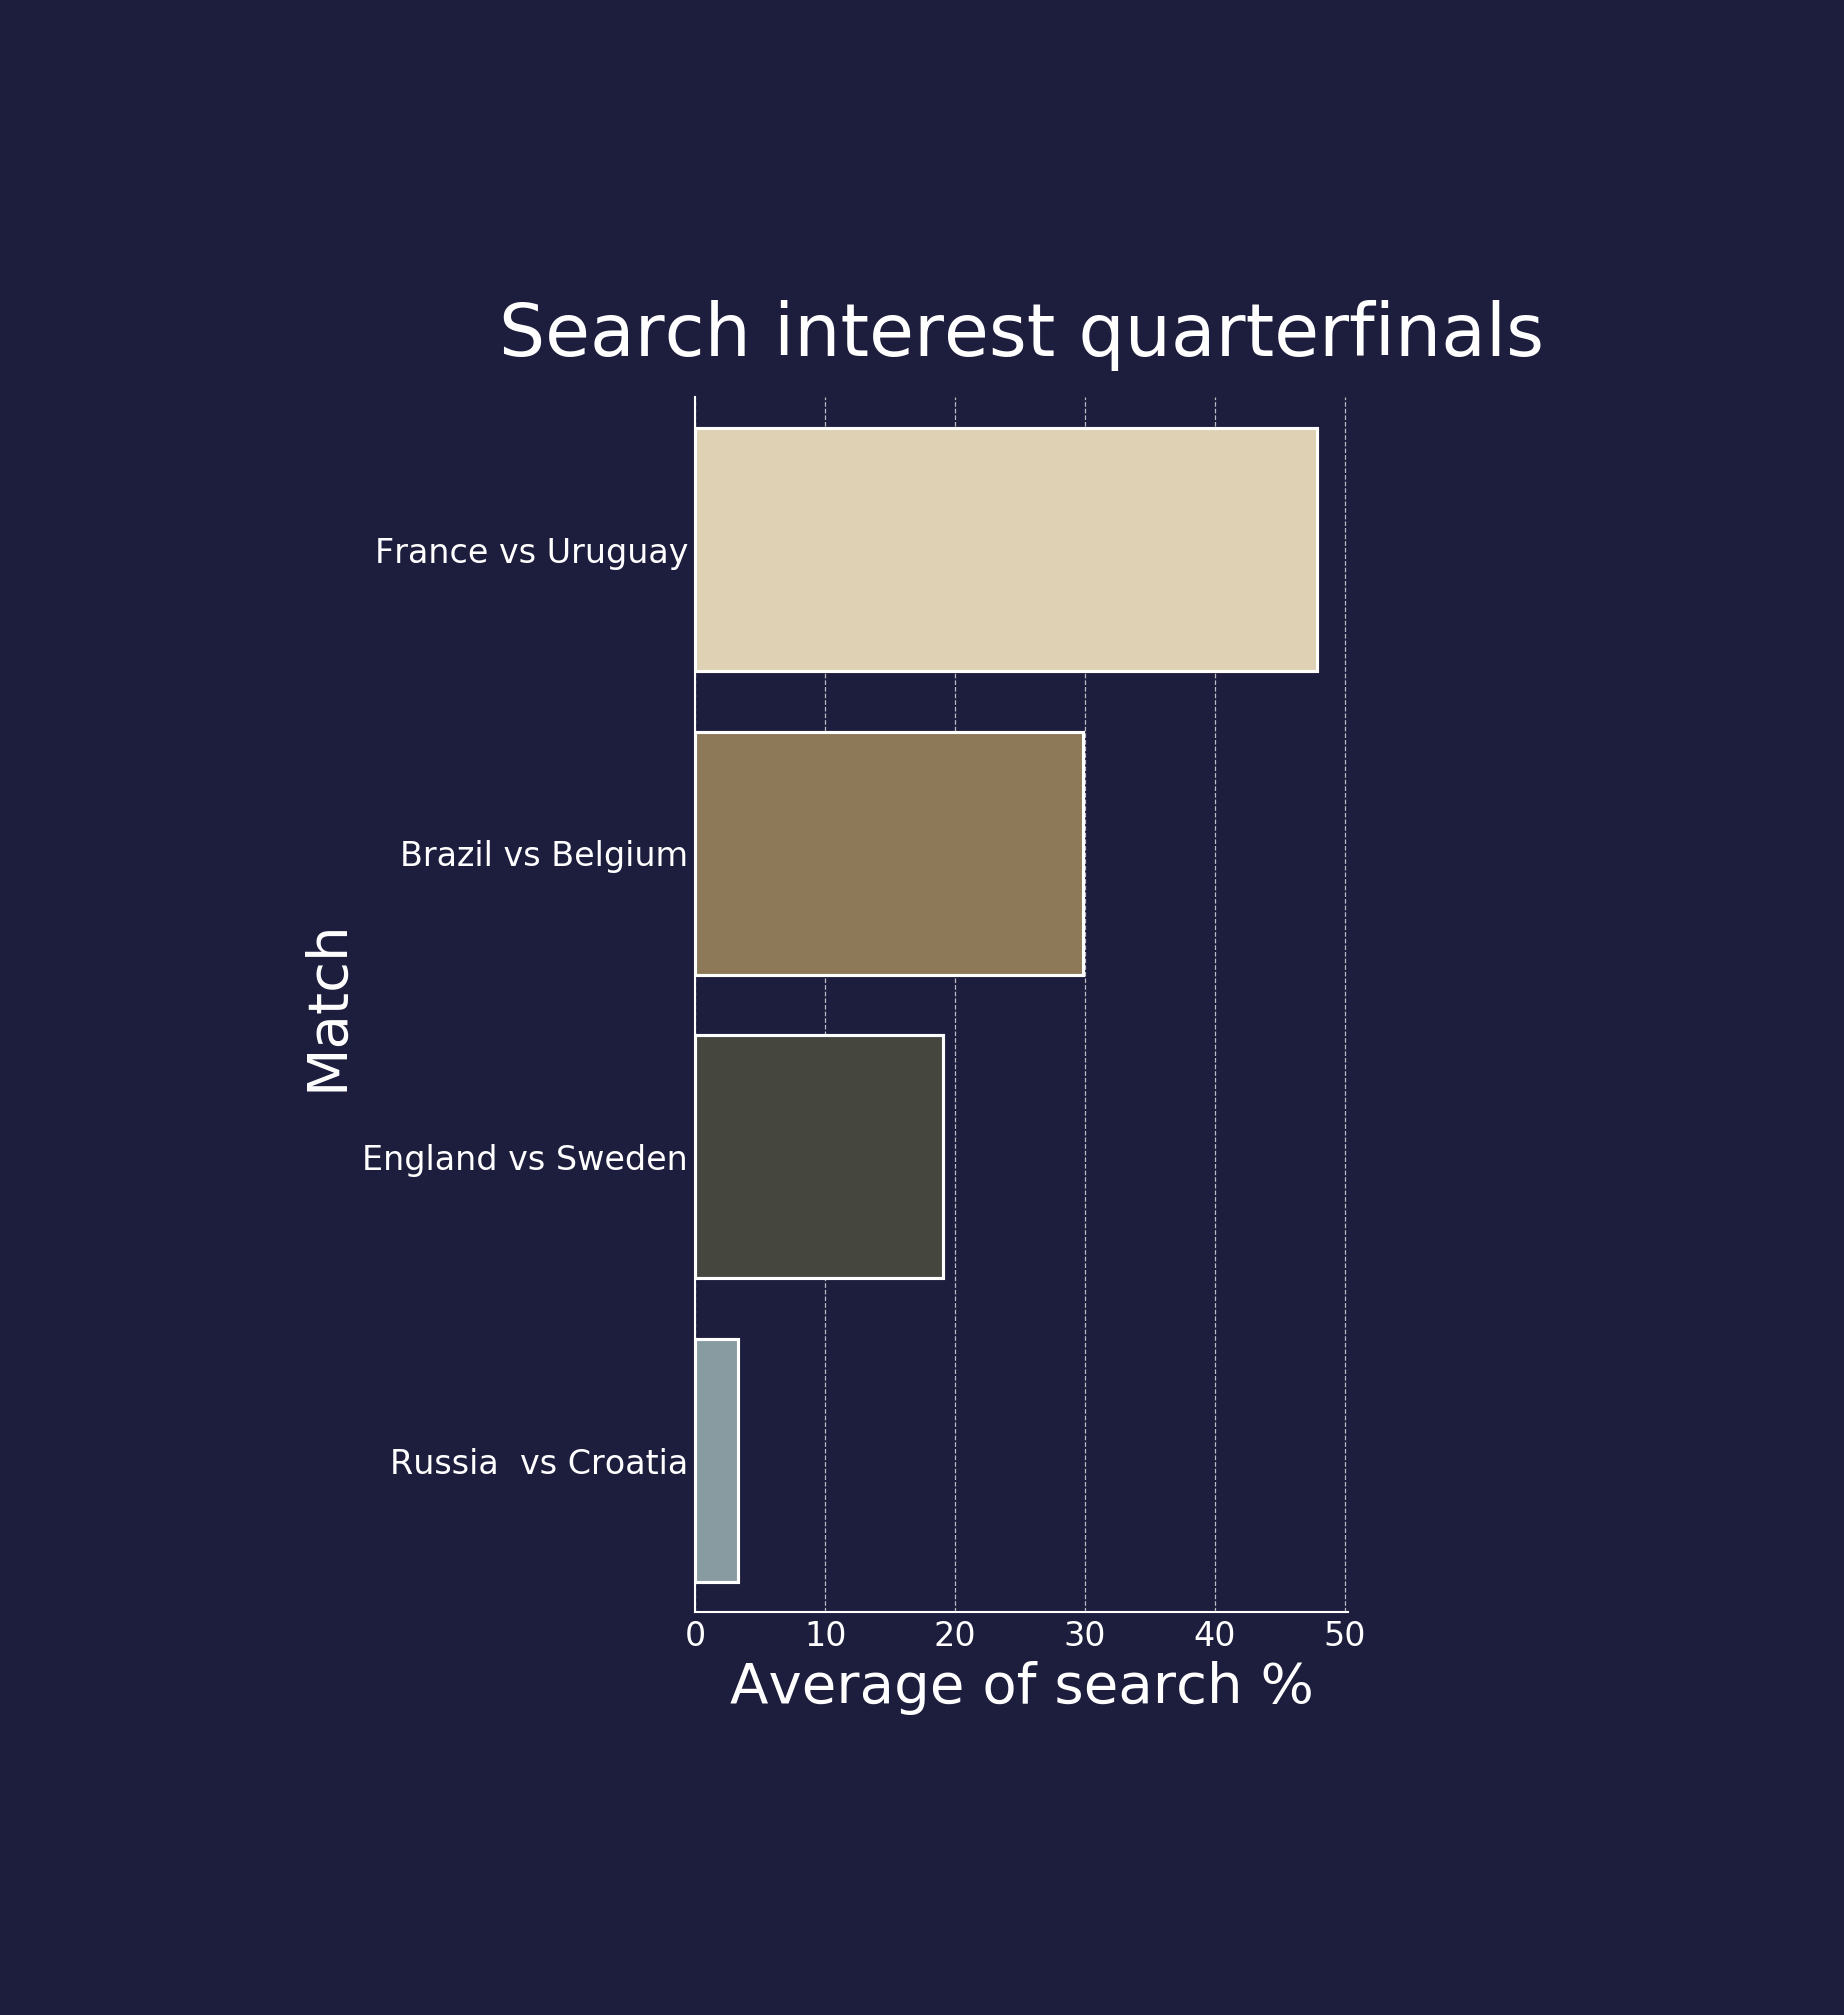

In [10]:
fig = plt.figure(figsize=(5,10))
ax = sns.barplot(y="Match", x="Share of search",orient="h", data = df_cuartos,palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("Search interest quarterfinals", pad=20, fontsize=35)
ax.set_xlabel("Average of search %", fontsize=27)
ax.set_ylabel("Match", fontsize=27)

plt.show()
fig.savefig('cuartos.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)

# Entrenadores

In [11]:
df_entrenadores = pd.read_csv("../../../data/Most searched World Cup coach .csv", skiprows=2)

In [12]:
df_entrenadores['entrenador_pais'] = df_entrenadores[['Coach', 'Country']].apply(lambda x: ' - '.join(x), axis=1)

In [13]:
df_entrenadores.head(100)

,Coach,Country,Search index,entrenador_pais
0,Joachim Löw,Germany,100,Joachim Löw - Germany
1,Fernando Hierro,Spain,66,Fernando Hierro - Spain
2,Jorge Sampaoli,Argentina,45,Jorge Sampaoli - Argentina
3,Héctor Cúper,Egypt,43,Héctor Cúper - Egypt
4,Gareth Southgate,England,39,Gareth Southgate - England
5,Hervé Renard,Morocco,38,Hervé Renard - Morocco
6,Carlos Queiroz,Iran,37,Carlos Queiroz - Iran
7,Óscar Tabárez,Uruguay,32,Óscar Tabárez - Uruguay
8,Tite,Brasil,32,Tite - Brasil
9,Stanislav Cherchesov,Russia,31,Stanislav Cherchesov - Russia


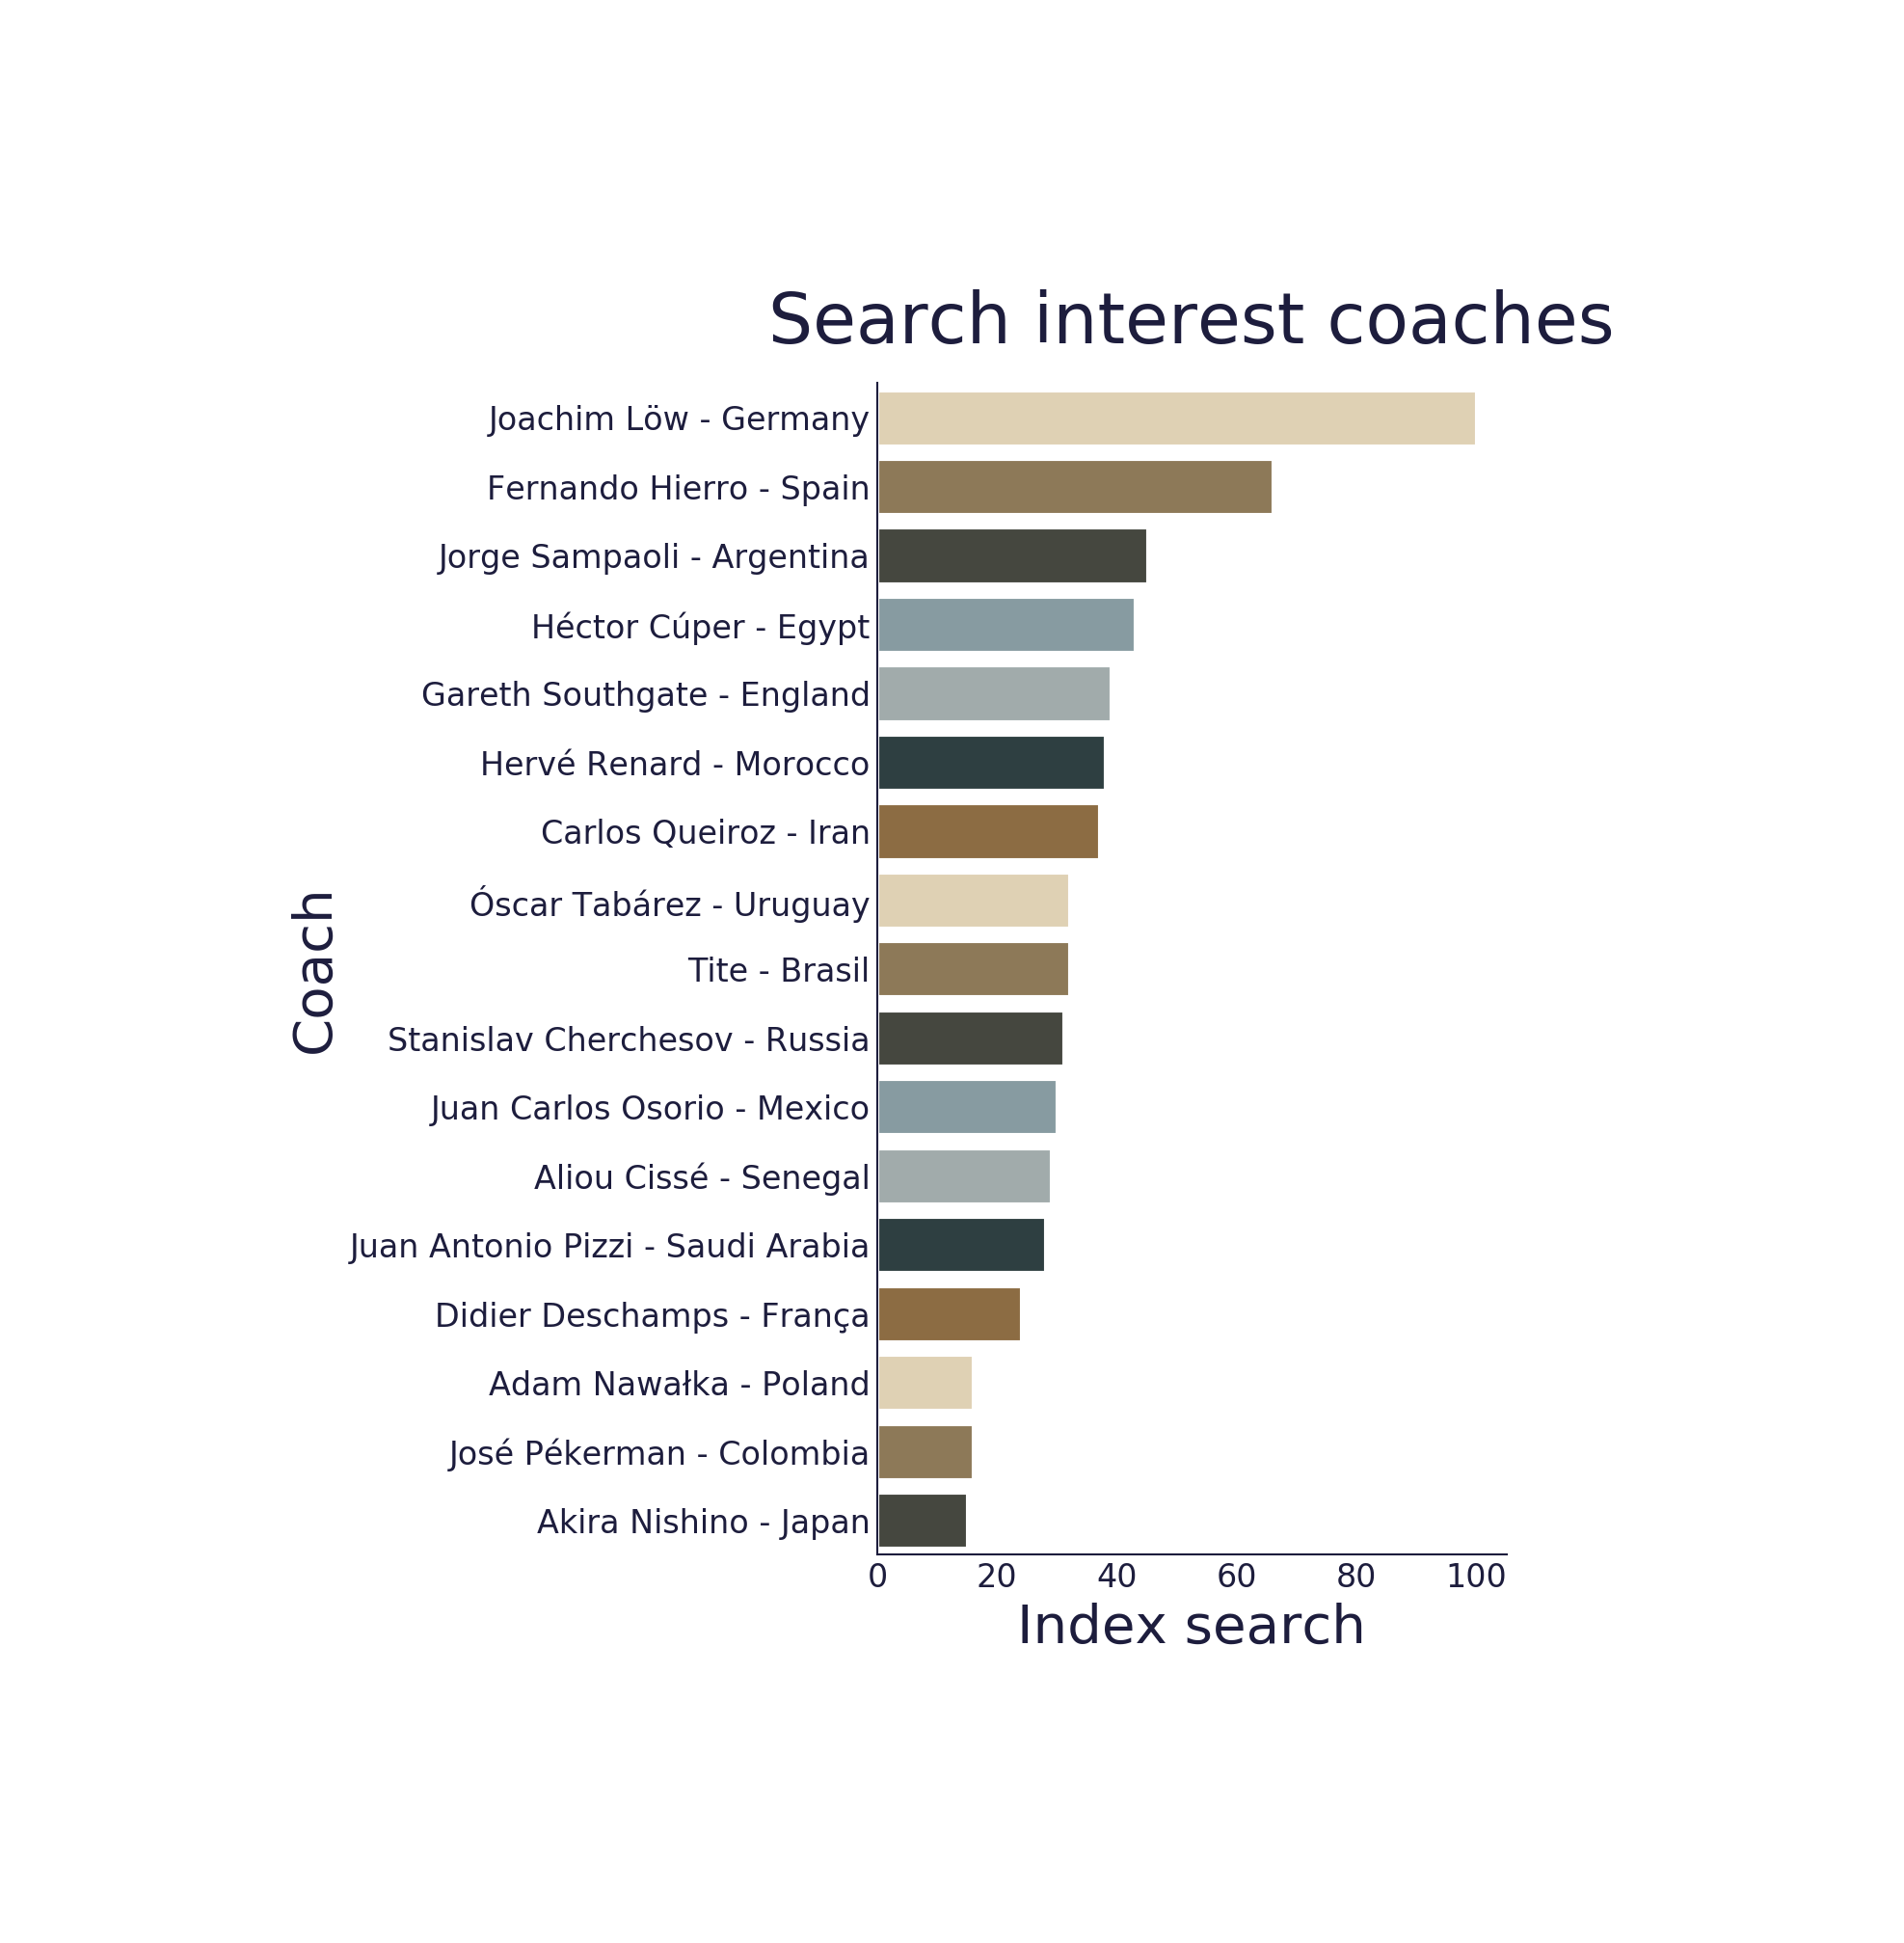

In [17]:
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')
fig = plt.figure(figsize=(5,10))
ax = sns.barplot(y="entrenador_pais", x="Search index",orient="h", data = df_entrenadores.head(17),palette=datatrooper_palette)
#plt.xlim(8, 8.6)
ax.set_title("Search interest coaches", pad=20, fontsize=35)
ax.set_xlabel("Index search", fontsize=27)
ax.set_ylabel("Coach", fontsize=27)

plt.show()
fig.savefig('entrenadores.png', facecolor=fig.get_facecolor(),pad_inches=2, bbox_inches="tight", dpi=100)